In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def graf_solucion_continua(yt,a,b):
  resol = 512
  tn = np.linspace(a,b,resol + 1)
  yn = np.zeros(resol+1)
  for n in range(resol+1):
    yn[n]=yt( tn[n] )
  plt.plot(tn,yn,'-b')
  plt.xlabel('x')
  plt.ylabel('u')
  plt.grid(True)

def graf_solucion_discreta(th,yh):
  # yh, th con longitud N+1 deben incluir valor inicial y0 y tiempo inicial t0
  plt.plot(th,yh,':.r')

In [ ]:
def u_exacta(x):
  match problema:
    case 1:
      u = x**2 - x
    case 2:
      u = np.exp(2*x)
    case 3:
      u = x**(5/2)
    case 4:
      L = 1
      # asumimos que coef_b es constante y diferente de cero
      u = 1- (1-np.exp(coef_b(x)*x))/(1-np.exp(coef_b(x)*L))
  return u

def du_exacta(x):
  match problema:
    case 1:
      du = 2.0*x-1.0
    case 2:
      du = 2*np.exp(2*x)
    case 3:
      du = (5/2)*x**(3/2)
    case 4:
      L = 1
      # asumimos que coef_b es constante y diferente de cero
      du = coef_b(x)*np.exp(coef_b(x)*x)/(1-np.exp(coef_b(x)*L))
  return du

def d2u_exacta(x):
  match problema:
    case 1:
      d2u = 2.0
    case 2:
      d2u = 4*np.exp(2*x)
    case 3:
      d2u = (15/4)*x**(1/2)
    case 4:
      L = 1
      # asumimos que coef_b es constante y diferente de cero
      d2u = coef_b(x)**2 *np.exp(coef_b(x)*x)/(1-np.exp(coef_b(x)*L))
  return d2u

def fuente(x):
  if manufacturada:
    # en este caso, se aplica el operador diferencial a solución manufacturada
    f = -coef_a*d2u_exacta(x) + coef_b(x)*du_exacta(x) + coef_c(x)*u_exacta(x)
  else:
     # si no se usa solución manufacturada se debe dar el valor deseado para
     # la carga de cada problema, con un match-case posiblemente
    f = 1
  return f

def d_izq(x_izq):
  if manufacturada:
    d = u_exacta(x_izq)
  else:
     # si no se usa solución manufacturada se debe dar el valor deseado para
     # la carga de cada problema, con un match-case posiblemente
    d = 1
  return d

def d_der(x_der):
  if manufacturada:
    d = u_exacta(x_der)
  else:
     # si no se usa solución manufacturada se debe dar el valor deseado para
     # la carga de cada problema, con un match-case posiblemente
    d = 0
  return d

def g_izq(x_izq):
  if manufacturada:
    g = coef_a*du_exacta(x_izq)
  else:
     # si no se usa solución manufacturada se debe dar el valor deseado para
     # la carga de cada problema, con un match-case posiblemente
    g = 0
  return g

def g_der(x_der):
  if manufacturada:
    g = -coef_a*du_exacta(x_der)
  else:
     # si no se usa solución manufacturada se debe dar el valor deseado para
     # la carga de cada problema, con un match-case posiblemente
    g = 0
  return g

ED
$$
(-a(x)u'(x))'+b(x)u'(x)+c(x)u(x) = f(x)
$$
Operador diferencial
$$
\mathcal{L}y=(-a(x)y'(x))'+b(x)y'(x)+c(x)y(x)
$$
Ejemplo
$$
-u''+3u=f \\
u(0)=d_{izq} \\
-u'(1)=g_{der}
$$

Ecuaciones para nodos internos

$$
-\frac{a}{h^2}U_{i-1}+\left(\frac{2a}{h^2}+c\right)U_i-\frac{a}{h^2}U_{i+1}=f(x_i)
$$

Para la condición Dirichlet en la derecha
$$
U_0 = d_{izq}
$$
Para la condición Neumann en la izquierda
$$
\frac{-2a}{h^2}U_{M-1}+\left(\frac{2a}{h^2}+c\right)U_M=f(x_M)-g_{der}\frac{2}{h}
$$

In [ ]:
def MDF(x_izq,cond_izq,x_der,cond_der,M):
  # creamos nodos y calculamos h
  x_nod=np.linspace(x_izq,x_der,M+1)
  h= (x_der-x_izq)/float(M)

  # Empezamos a armar una matriz M+1 x M+1 K,
  # y un vector de términos independientes F
  # La idea es resolver sistema K U = F, donde U contiene las soluciones nodales

  # inicializamos
  K = np.zeros((M+1,M+1))
  F = np.zeros(M+1)
  U = np.zeros(M+1)

  # Primero llenamos ecuaciones para los nodos internos  1,2,3,...,M-1
  for i in range(1,M):    # fila i de matriz K y vector F
    K[i][i-1] = -coef_a / h**2
    K[i][i]   = 2*coef_a/h**2 + coef_c(x_nod[i])
    K[i][i+1] = -coef_a / h**2
    F[i]      = fuente(x_nod[i])

    # agregamos discretización del término de advección
    # # DF centradas   b ( U_{i+1} - U_{i-1} ) / 2h
    # K[i][i+1] +=  coef_b(x_nod[i]) / (2*h)
    # K[i][i-1] += -coef_b(x_nod[i]) / (2*h)
    if   coef_b(x_nod[i])<0:
      # DF progresivas   b ( U_{i+1} - U_{i} ) / h
      K[i][i+1] +=  coef_b(x_nod[i]) / (h)
      K[i][i]   += -coef_b(x_nod[i]) / (h)
    elif coef_b(x_nod[i])>0:
      # DF regresivas   b ( U_{i} - U_{i-1} ) / h
      K[i][i]   +=  coef_b(x_nod[i]) / (h)
      K[i][i-1] += -coef_b(x_nod[i]) / (h)


  # Ahora, condición en extremo izquierdo ----> fila 0 de matriz K y vector F
  match cond_izq:
    case 'Dirichlet':
    # Condición Dirichlet
      K[0][0] = 1.0
      F[0]    = d_izq(x_izq)
    case 'Neumann':
    # Condición Neumann
      K[0][0] = 2*coef_a/h**2 + coef_c(x_izq)
      K[0][1] = -2*coef_a/h**2
      F[0]    = fuente(x_izq)-g_izq(x_izq) * 2.0 / h
    # término de advección
      if   coef_b(x_izq)<0:
        K[0][1] +=  coef_b(x_izq) / (h)
        K[0][0] += -coef_b(x_izq) / (h)
      elif coef_b(x_izq)>0:
        K[0][0] +=  coef_b(x_izq) / (h)
        F[0]    += -g_izq(x_izq) * coef_b(x_izq) / coef_a
  # Ahora, condición en extremo derecho ----> fila M de matriz K y vector F
  match cond_der:
    case 'Dirichlet':
    # Condición Dirichlet
      K[M][M] = 1.0
      F[M]    = d_der(x_der)
    case 'Neumann':
    # Condición Neumann
      K[M][M-1]= -2*coef_a/h**2
      K[M][M]  = 2*coef_a/h**2 + coef_c(x_der)
      F[M]     = fuente(x_der)-g_der(x_der) *2.0 / h
# término de advección
      if   coef_b(x_izq)<0:
        K[M][M]   +=  coef_b(x_der) / (h)
        F[M]      += -g_izq(x_der) * coef_b(x_der) / coef_a
      elif coef_b(x_izq)>0:
        K[M][M-1] += -coef_b(x_der) / (h)
        K[M][M]   +=  coef_b(x_der) / (h)
    # Se debería modificar también las ecuaciones para estos nodos para incluir el término de adveción


  # Resuelvo sistema
  U = np.linalg.solve(K,F)

  return x_nod,U   #   lista de nodos, lista de soluciones nodales



La ecuación diferencial
$$
-u''=f
$$
conocida como la ecuación de Poisson (no hay convección ni reacción), no tiene única solución cuando solo se trata de aplicar condiciones de frontera Neumann. Necesitamos condición Dirichlet o Robin al menos en una parte de la frontera.

El método de diferencias finitas hereda esa situación, pues la matriz de rigidez se vuelve singular (no invertible) cuando solo se aplican condiciones Neumann.

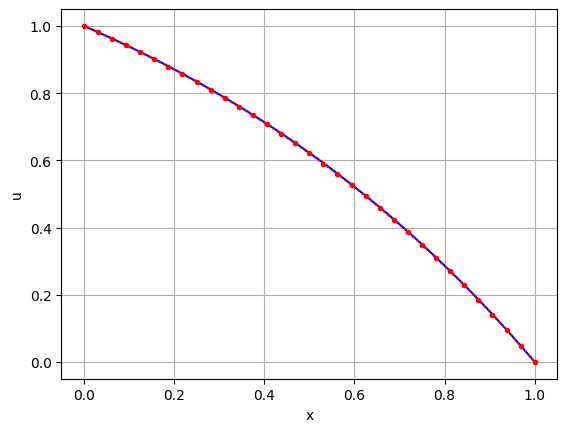

In [ ]:
problema = 4
manufacturada = True
# asumimos un coeficiente de difusión constante
coef_a = 1.0
# pero los de convección (advección) y reacción sí pueden ser variables, según la ubicación del punto x
coef_b = lambda x : 1.0
coef_c = lambda x : 0

x_izq = 0.0
cond_izq = 'Dirichlet'    #  los valores son 'Dirichlet' o 'Neumann'
x_der = 1.0
cond_der = 'Dirichlet'    #  los valores son 'Dirichlet' o 'Neumann'

M = 32

x_nod,U = MDF(x_izq,cond_izq,x_der,cond_der,M)

# para graficar sol continua
if manufacturada:
  graf_solucion_continua(u_exacta,x_izq,x_der)

graf_solucion_discreta(x_nod,U)



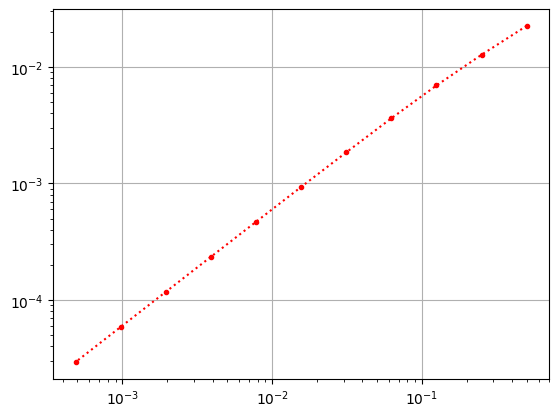

In [ ]:
niveles = 11

lista_h = []
lista_e = []

for i in range(1,niveles+1):
  M = 2**i
  lista_h.append((x_der-x_izq)/M)
  x_nod,U = MDF(x_izq,cond_izq,x_der,cond_der,M)
  lista_e.append( np.linalg.norm(U-u_exacta(x_nod),np.inf) )

plt.loglog(lista_h,lista_e,':.r')
plt.grid(True)